In [1]:
import warnings
warnings.filterwarnings('ignore')

# Firstly, import the data and view the distribution of overall data
import pandas as pd
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
print(data_train.info())
print(data_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [2]:
# we got information: 
# 1. there are loss information for some properties.
# 2. 38 numeric properties + 43 object properties.
data_train.head()
data_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


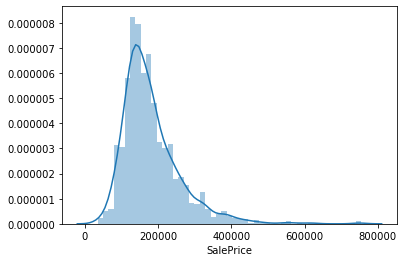

In [3]:
# now we analyze the correlation between the numeric properties and the sale price
import seaborn as sns
sns.distplot(data_train['SalePrice'])

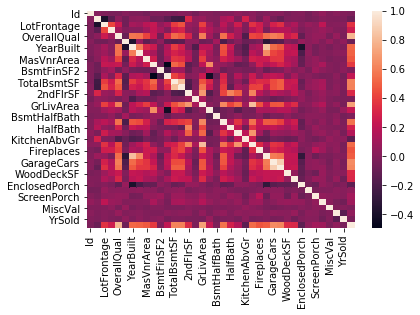

In [4]:
# heatmap
data = data_train.corr()
sns.heatmap(data)

In [5]:
# show the raking of relative properties
data['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

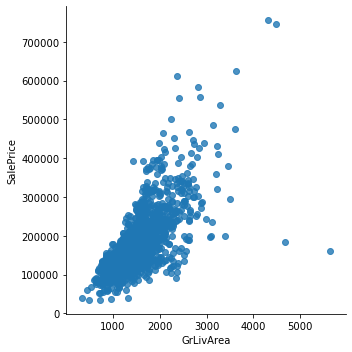

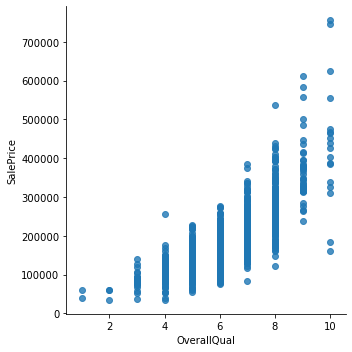

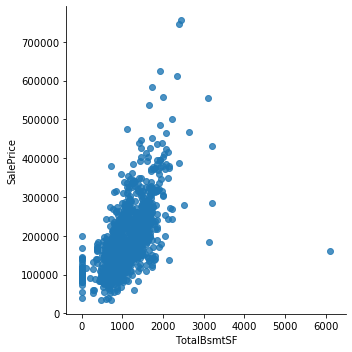

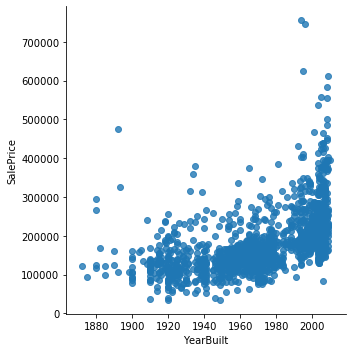

In [6]:
# process anormaly data
sns.lmplot(x='GrLivArea', y='SalePrice', data=data_train, fit_reg=False, scatter=True)
sns.lmplot(x='OverallQual', y='SalePrice', data=data_train, fit_reg=False, scatter=True)
sns.lmplot(x='TotalBsmtSF', y='SalePrice', data=data_train, fit_reg=False, scatter=True)
sns.lmplot(x='YearBuilt', y='SalePrice', data=data_train, fit_reg=False, scatter=True)

In [7]:
# drop anormaly data
data_train.drop(data_train[(data_train['OverallQual']<5) & (data_train['SalePrice']>200000)].index,inplace=True)
data_train.drop(data_train[(data_train['GrLivArea']>4000) & (data_train['SalePrice']<200000)].index,inplace=True)
data_train.drop(data_train[(data_train['YearBuilt']<1900) & (data_train['SalePrice']>400000)].index,inplace=True)
data_train.drop(data_train[(data_train['TotalBsmtSF']>6000) & (data_train['SalePrice']<200000)].index,inplace=True)
data_train.reset_index(drop=True, inplace=True)

In [8]:
print(data_train.shape)

(1456, 81)


In [9]:
# combine train and test data
all_data = pd.concat((data_train.iloc[:, 1:-1], data_test.iloc[:, 1:]))
print(all_data.shape)

(2915, 79)


In [10]:
# process loss data
# count loss data
for col in all_data.columns:
    if all_data[col].isnull().sum()>0:
        print(col, all_data[col].isnull().sum())

MSZoning 4
LotFrontage 485
Alley 2717
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 24
MasVnrArea 23
BsmtQual 81
BsmtCond 82
BsmtExposure 82
BsmtFinType1 79
BsmtFinSF1 1
BsmtFinType2 80
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
Electrical 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 1420
GarageType 157
GarageYrBlt 159
GarageFinish 159
GarageCars 1
GarageArea 1
GarageQual 159
GarageCond 159
PoolQC 2906
Fence 2345
MiscFeature 2810
SaleType 1


In [11]:
# delete propeties with too much loss data and properties with less correlation to sale price
all_data = all_data.drop(["MiscFeature", "PoolQC", "Alley", "Fence","GarageFinish", "KitchenAbvGr", "MSSubClass", "LowQualFinSF", "MiscVal", "BsmtHalfBath", "BsmtFinSF2", "MoSold", "PoolArea"], axis=1)
print(all_data.shape)

In [13]:
# add loss data
# for GarageYrBlt, add 1980
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(1980)

In [14]:
# for numerial properties, add 0 (except for GarageYrBlt)
# for object properties, add NA
for col in all_data.columns:
    if all_data[col].isnull().sum() > 0:
        if all_data[col].dtypes == 'object':
            all_data[col] = all_data[col].fillna('NA')
        else:
            all_data[col] = all_data[col].fillna(0)

In [15]:
for col in all_data.columns:
    if all_data[col].isnull().sum()>0:
        print(col, all_data[col].isnull().sum())

In [16]:
# feature enginering
# add new features
all_data['TotalArea'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF'] + all_data['GrLivArea'] +all_data['GarageArea']
all_data['Bathrooms'] = all_data['FullBath'] + all_data['HalfBath']*0.5 
all_data['Year average']= (all_data['YearRemodAdd']+all_data['YearBuilt'])/2

# space in house
all_data['HasWoodDeck'] = (all_data['WoodDeckSF'] == 0) * 1
all_data['HasOpenPorch'] = (all_data['OpenPorchSF'] == 0) * 1
all_data['HasEnclosedPorch'] = (all_data['EnclosedPorch'] == 0) * 1
all_data['Has3SsnPorch'] = (all_data['3SsnPorch'] == 0) * 1
all_data['HasScreenPorch'] = (all_data['ScreenPorch'] == 0) * 1

# year since remodel
all_data['YearsSinceRemodel'] = all_data['YrSold'] - all_data['YearRemodAdd']
# overall quality
all_data['Total_Home_Quality'] = all_data['OverallQual'] + all_data['OverallCond']

In [17]:
print(all_data.shape)

(2915, 76)


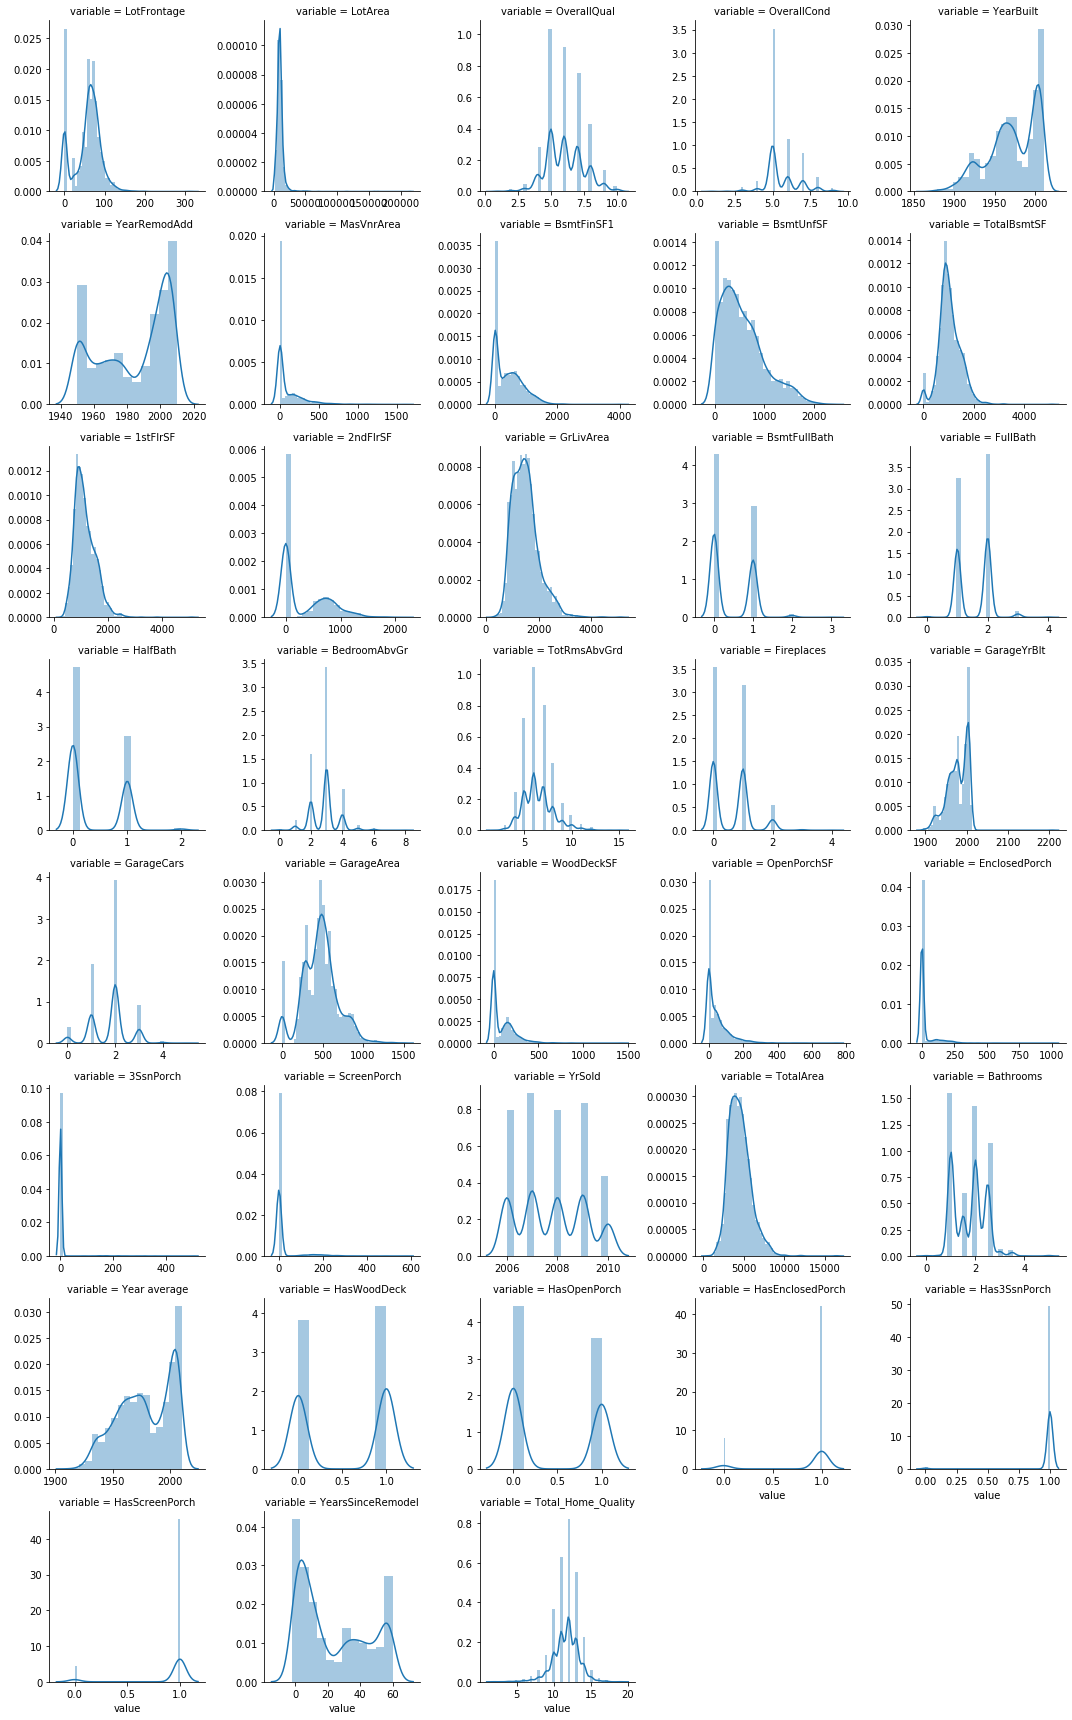

In [18]:
# data transformation
from scipy.stats import skew
import numpy as np

numeric_feats = [f for f in all_data.columns if all_data.dtypes[f] != 'object']

f = pd.melt(all_data, value_vars= numeric_feats)
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [19]:
# compute skewness and log1p transform
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False) 
skewed_feats = skewed_feats[abs(skewed_feats) > 0.75].index

for feat in skewed_feats:
    all_data[feat] = np.log1p(all_data[feat])

In [20]:
# Convert non-numeric properties
all_data = pd.get_dummies(all_data)
print(all_data.shape)

In [22]:
all_data.to_csv("all.csv", index= False)

In [23]:
# split all_data into train and test
index = data_train.shape[0]
train = all_data[:index]
test = all_data[index:]

In [24]:
import numpy as np
from sklearn import linear_model, kernel_ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import sklearn.metrics as sklm
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

In [25]:
# split train data into train and val
X = train
y = np.log1p(data_train["SalePrice"])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state=0)

In [26]:
# compute rmse loss using cv for model
def rmse_cv(model,X,y):
    rmse = np.sqrt(np.mean(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)))
    return rmse

In [27]:
# choose best parameters for models
# Ridge Regression

ridge = linear_model.Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg = GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
ridge_reg.fit(x_train,y_train)
print("The best value of Alpha is: ",ridge_reg.best_params_)
print("The best score achieved with Alpha=8 is: ",np.sqrt(-ridge_reg.best_score_))

The best value of Alpha is:  {'alpha': 8}
The best score achieved with Alpha=8 is:  0.1149519752432578


In [28]:
ridge_mod = linear_model.Ridge(alpha=10)
ridge_mod.fit(x_train,y_train)
y_pred_train = ridge_mod.predict(x_train)
y_pred_test = ridge_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(np.sqrt(sklm.mean_squared_error(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(sklm.mean_squared_error(y_test, y_pred_test)))) 

Root Mean Square Error train = 0.09265184719681048
Root Mean Square Error test = 0.11372389316453549


In [29]:
# Lasso Regression

parameters= {'alpha':[0.0001,0.001,0.002,0.003,0.01,0.1,1,10,100]}

lasso = linear_model.Lasso()
lasso_reg = GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
lasso_reg.fit(x_train,y_train)

print('The best value of Alpha is: ',lasso_reg.best_params_)

The best value of Alpha is:  {'alpha': 0.001}


In [30]:
lasso_mod = linear_model.Lasso(alpha=0.001)
lasso_mod.fit(x_train,y_train)
y_lasso_train = lasso_mod.predict(x_train)
y_lasso_test = lasso_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(np.sqrt(sklm.mean_squared_error(y_train, y_lasso_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(sklm.mean_squared_error(y_test, y_lasso_test))))

Root Mean Square Error train = 0.10031288715173457
Root Mean Square Error test = 0.11169090531714523


In [31]:
# ElasticNet

parameters = {'alpha':[10,1,0.1,0.01,0.001,0.002,0.003,0.004,0.005,0.00055], 'l1_ratio':[0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]}

elastic = linear_model.ElasticNet()
elastic_reg = GridSearchCV(elastic, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
elastic_reg.fit(x_train, y_train)
print("The best value of parameter is: ",elastic_reg.best_params_)
print("The best score is: ",np.sqrt(-elastic_reg.best_score_))

The best value of parameter is:  {'alpha': 0.00055, 'l1_ratio': 0.95}
The best score is:  0.11201777991420418


In [32]:
elastic_mod = linear_model.ElasticNet(alpha=0.00055, l1_ratio=0.95)
elastic_mod.fit(x_train,y_train)
y_elastic_train = elastic_mod.predict(x_train)
y_elastic_test = elastic_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(np.sqrt(sklm.mean_squared_error(y_train, y_elastic_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(sklm.mean_squared_error(y_test, y_elastic_test))))

Root Mean Square Error train = 0.09473708544202007
Root Mean Square Error test = 0.11132514557998964


In [33]:
# Random Forest Regrssion

RFR = RandomForestRegressor()
score = rmse_cv(RFR,X,y)

print('RMSE = '+ str(score))

RMSE = 0.13086402169083697


In [34]:
# Gradient Boosting Regrssion

GBR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, 
                                min_samples_split=10, loss='huber', random_state =5)
score = rmse_cv(GBR,X,y)

print('RMSE = '+ str(score))

RMSE = 0.11567021971706186


In [35]:
# SVR Regrssion

SVR = SVR()
score = rmse_cv(SVR,X,y)

print('RMSE = '+ str(score))

RMSE = 0.24273416170671358


In [36]:
# Linear SVR Regrssion

LSVR = LinearSVR()
score = rmse_cv(LSVR,X,y)

print('RMSE = '+ str(score))

RMSE = 0.20775585548359787


In [37]:
# Bayesian Regrssion

BR = linear_model.BayesianRidge()
score = rmse_cv(BR,X,y)

print('RMSE = '+ str(score))

RMSE = 0.11118719742464545


In [38]:
# ExtraTrees Regrssion

ETR = ExtraTreesRegressor()
score = rmse_cv(ETR,X,y)

print('RMSE = '+ str(score))

RMSE = 0.1266688087904487


In [39]:
# XGB Regrssion

# it takes forever time for chossing parameter for XGB
# xg_reg = XGBRegressor()
# xgparam_grid= {'learning_rate' : [0.01],'n_estimators':[2000, 3460, 4000],'max_depth':[3], 'min_child_weight':[0,3,5],
#                'colsample_bytree':[0.5,0.7],'reg_alpha':[0.0001,0.001,0.01,0.1,10,100],'reg_lambda':[1,0.01,0.8,0.001,0.0001]}

# xg_grid = GridSearchCV(xg_reg, param_grid=xgparam_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# xg_grid.fit(x_train,y_train)
# print(xg_grid.best_estimator_)
# print(xg_grid.best_score_)

xgb_mod = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,learning_rate=0.05, max_depth=3,min_child_weight=1.7817,
                             n_estimators=2200,reg_alpha=0.4640, reg_lambda=0.8571, subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
score = rmse_cv(xgb_mod,X,y)

print('RMSE = '+ str(score))

RMSE = 0.11459053456970139


In [40]:
# Light GBM
lgb_mod = LGBMRegressor(objective='regression',num_leaves=5,learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmse_cv(lgb_mod,X,y)

print('RMSE = '+ str(score))

RMSE = 0.11641312678155306


In [41]:
ridge = linear_model.Ridge(alpha=8)
lasso = linear_model.Lasso(alpha=0.001)
elastic = linear_model.ElasticNet(alpha=0.00055,  l1_ratio=0.95)
GBR =  GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,max_depth=4, max_features='sqrt', min_samples_leaf=15,
                                 min_samples_split=10, loss='huber', random_state =5)
BR = linear_model.BayesianRidge()
XGB = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,learning_rate=0.05, max_depth=3,min_child_weight=1.7817,
                             n_estimators=2200,reg_alpha=0.4640, reg_lambda=0.8571, subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [42]:
# average models
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [43]:
# average six models
weight_avg = AveragingModels(models = [ridge,lasso,elastic,GBR,BR,XGB])

score = rmse_cv(weight_avg, X, y)
print(str(score))

0.10752965463314261


In [44]:
# stack models
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [45]:
# stacked_averaged_models = StackingAveragedModels(base_models = (lasso,elastic,GBR,BR,XGB), meta_model = ridge)

# score = rmse_cv(stacked_averaged_models, X, y)
# print(str(score))

In [47]:
from mlxtend.regressor import StackingRegressor

stregr = StackingRegressor(regressors=[ridge,lasso,elastic,GBR,BR], meta_regressor=ridge, use_features_in_secondary=True)

score = rmse_cv(stregr, X, y)
print(str(score))

0.10896948633726164


In [48]:
# try one model
X = train
y = np.log1p(data_train["SalePrice"])

avg= weight_avg.fit(X, y)
results = avg.predict(test)
final = np.expm1(results)

submission = pd.DataFrame()
submission['Id'] = data_test.Id
submission['SalePrice'] = final

In [49]:
submission.head()

,Id,SalePrice
0,1461,120590.964052
1,1462,160868.288192
2,1463,184475.830720
3,1464,198274.699053
4,1465,189998.465920


In [50]:
submission.to_csv("submission.csv", index= False)

In [51]:
# multiple models
X = train
y = np.log1p(data_train["SalePrice"])

str = stregr.fit(X, y)
results = str.predict(test)
final_str = np.expm1(results)

rid = ridge.fit(X, y)
results = rid.predict(test)
final_rid = np.expm1(results)

avg= weight_avg.fit(X, y)
results = avg.predict(test)
final_avg = np.expm1(results)

submission = pd.DataFrame()
submission['Id'] = data_test.Id
submission['SalePrice'] = final_str * 0.15 + final_avg * 0.75 + final_rid * 0.1 

In [52]:
submission.head()

,Id,SalePrice
0,1461,122220.427148
1,1462,160509.509691
2,1463,184457.805472
3,1464,199617.047068
4,1465,192697.218914


In [53]:
submission.to_csv("submission.csv", index= False)